# Investigating Graphene
Nothing profound here, just playing around with routines to calculate 2D materials, and thought that graphene would be a good place to start.

Todo:
* Computer graphics have the y axis pointing down, which is the opposite of what most molecular graphics use. Figure out a pythonic way to do this transformation
* Recompute the bounding box and shift so that all objects are visible even if they go negative.

In [142]:
import math
import numpy as np

class Lattice2D:
    def __init__(self,A,B,alpha=90,scalef=100):
        deg = math.pi/180
        alpha = alpha*deg

        self.Avec = np.array((A,0))
        self.Bvec = np.array((B*math.cos(alpha),B*math.sin(alpha)))

        self.atoms = []
        self.scalef = scalef
        return
    
    def add_atom(self,symbol,x,y):
        # Note, coordinates are in lattice coords
        self.atoms.append((symbol,x,y))
        return
    
    def _repr_svg_(self): return self.to_svg()
    
    def to_svg(self):
        A = self.Avec
        B = self.Bvec
        
        O = np.array((0,0))

        svg = svg_plotter(
            lines = [(O,O+A),
                     (O,O+B),
                     (O+A,O+A+B),
                     (O+B,O+A+B)],
            circles = [(x*A+y*B,0.1) for sym,x,y in self.atoms]
        )
        #print(svg)
        return svg

class HexLattice(Lattice2D):
    def __init__(self,A,scalef=100):
        Lattice2D.__init__(self,A,A,60,scalef)

In [143]:
def svg_plotter(lines,circles,scalef=100):
    from svgscene import Scene
    scene = Scene()
    xmin,xmax,ymin,ymax = bbox(lines,circles)
    origin = np.array([xmin,ymin])
    def xfrm(pt):
        x,y = pt
        x = scalef*(x-xmin)
        y = scalef*(ymax-y+ymin+0.1)
        return x,y
    for start,end in lines:
        scene.line(xfrm(start),xfrm(end))
    for center,radius in circles:
        scene.circle(xfrm(center),scalef*radius)
    return scene.to_svg()

def bbox(lines,circles,buffer=0.75,BIG=1000000):
    xmin=ymin=BIG
    xmax=ymax=-BIG
    for start,end in lines:
        xmin = min(xmin,start[0],end[0])
        xmax = max(xmax,start[0],end[0])
        ymin = min(ymin,start[1],end[1])
        ymax = max(ymax,start[1],end[1])
    for center,radius in circles:
        xmin = min(xmin,center[0]-radius)
        xmax = max(xmax,center[0]+radius)
        ymin = min(ymin,center[1]-radius)
        ymax = max(ymax,center[1]+radius)
        
    return xmin-buffer,xmax+buffer,ymin-buffer,ymax+buffer


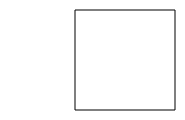

In [144]:
Lattice2D(1,1)

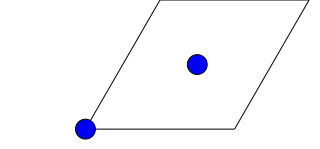

In [145]:
A = 1.5
graphene = HexLattice(A)
graphene.add_atom('C',0,0)
graphene.add_atom('C',A/3,A/3)
graphene

Okay, this now works with Py3. Added encoding="unicode" to the ET.tostring() call. Have to think of a pythonic way to transform from graphical coordinates (y points down) to the normal way we draw structures.